In [32]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [115]:
target1 = pd.read_csv('J014517.82+135602.2.csv')
opflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
abflux = 10**(23-(target1.Mag +48.6)/2.5)
opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

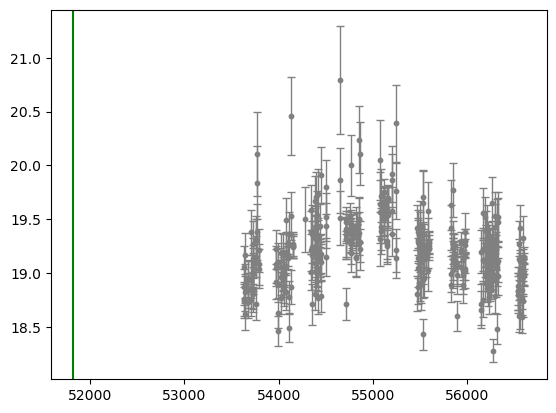

In [34]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 51820, color ='g')	
#plt.axvline(x= 53379, color ='g')	

In [35]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

357

In [36]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.007510000003094319,
 0.007469999996828847,
 0.007500000006984919,
 9.921969999995781,
 0.0072399999990011565,
 0.007280000005266629,
 0.007259999998495914,
 26.89763999999559,
 0.00458000000071479,
 0.00458000000071479,
 0.004590000004100148,
 29.89043999999558,
 0.006440000004658941,
 0.006419999997888226,
 0.006430000001273584,
 22.99721999999747,
 0.009209999996528495,
 0.009219999999913853,
 0.009200000000419095,
 5.948480000006384,
 0.006989999994402751,
 0.007020000004558824,
 0.0070100000011734664,
 25.95180999999866,
 0.0073999999949592166,
 0.007420000001729932,
 0.007420000001729932,
 14.940710000002582,
 0.008309999997436535,
 0.00413999999727821,
 17.005730000004405,
 0.00481999999465188,
 0.00479000000632368,
 185.30689999999595,
 0.0064399999973829836,
 0.006480000003648456,
 0.006470000000263099,
 16.97624999999971,
 0.006500000003143214,
 0.008159999997587875,
 0.006489999999757856,
 36.80591000000277,
 0.008549999998649582,
 0.008609999997133855,
 0.0086000000010244

In [37]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

8


[33, 71, 116, 157, 188, 227, 262, 328]

In [38]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[34, 38, 45, 41, 31, 39, 35, 66, 29]

In [39]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [40]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
20,J014517.82+135602.2,1112010056889,18.74,0.16,26.32399,13.93387,53636.38133,0
21,J014517.82+135602.2,1112010056889,18.76,0.16,26.32393,13.93391,53636.38884,0
22,J014517.82+135602.2,1112010056889,19.06,0.19,26.32402,13.93413,53636.39631,0
23,J014517.82+135602.2,1112010056889,18.87,0.17,26.32416,13.93405,53636.40381,0
12,J014517.82+135602.2,1112010056889,18.62,0.15,26.32425,13.93410,53646.32578,0
...,...,...,...,...,...,...,...,...
272,J014517.82+135602.2,1112010056889,19.33,0.20,26.32401,13.93397,56595.27332,0
353,J014517.82+135602.2,2113024028378,18.98,0.10,26.32420,13.93400,56604.24960,0
354,J014517.82+135602.2,2113024028378,18.99,0.10,26.32424,13.93397,56604.25811,0
355,J014517.82+135602.2,2113024028378,19.14,0.10,26.32421,13.93397,56604.26662,0


In [42]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
#print(df_1)
grouped_MJD[0][-1]

53790.10558

In [43]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
#print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

54147.10573

In [44]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54502.1

In [45]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54866.1179

In [46]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

55240.13837

In [47]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55589.13633

In [48]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55976.13092

In [49]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56325.1061

In [51]:
df_9 = data.iloc[seppt[7]+1:,:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56604.27513

In [21]:
df_10 = data.iloc[seppt[8]+1:seppt[9],:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

55976.13092

In [22]:
df_11 = data.iloc[seppt[9]+1:seppt[10],:]
#print(df_11)
df_11.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]
#make sure to change the index for the last group

56325.1061

In [23]:
df_12 = data.iloc[seppt[10]+1:,:]
#print(df_12)
df_12.to_csv('Group12.csv', index=False)
grouped_MJD[11][-1]
#make sure to change the index for the last group

56604.27513

In [52]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g1.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g2.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g3.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g4.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g5.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g6.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g7.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g8.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g9.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [ ]:
g10 = pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g10.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g11 = pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g11.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g12 = pd.read_csv('group12.csv')
med1 = np.median(g12.Mag)
centerMJD1 = np.mean(g12.MJD)
medMJD1 = np.median(g12.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g12.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [53]:
med

[18.99, 19.06, 19.229999999999997, 19.39, 19.59, 19.225, 19.18, 19.14, 18.985]

In [54]:
centerMJD

[53709.14681909091,
 54061.30120054054,
 54402.68092977272,
 54771.967319999996,
 55141.008065999995,
 55521.30114736843,
 55899.32888264706,
 56241.84614923077,
 56573.34018428571]

In [55]:
medMJD


[53726.1659,
 54056.26053,
 54403.241064999995,
 54769.24167,
 55131.27501,
 55509.134860000006,
 55892.202885000006,
 56244.32727,
 56576.345075000005]

In [56]:
medopflux


[9.156957116643899e-05,
 8.585157327483418e-05,
 7.341042211027996e-05,
 6.334725228364759e-05,
 5.268972863409747e-05,
 7.374697535946994e-05,
 7.687066932835869e-05,
 7.97525177270456e-05,
 9.19932536699024e-05]

In [83]:
st = 53636.38133
#start of observations

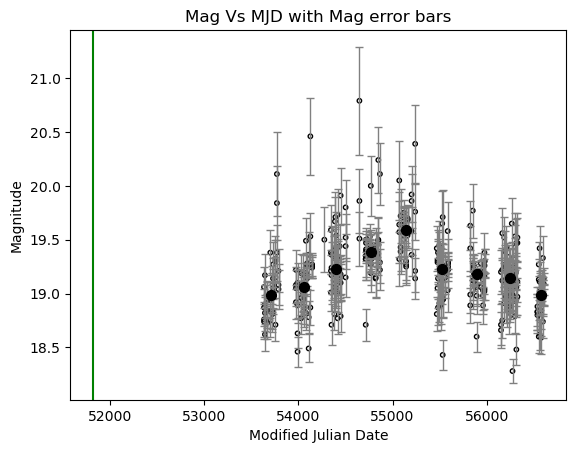

In [84]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 51820, color ='g')	
#plt.axvline(x= , color ='g')		

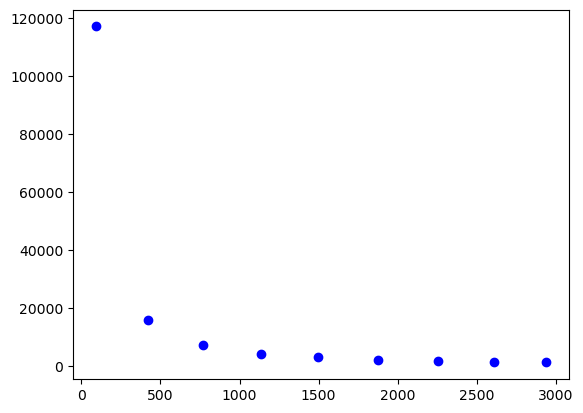

In [85]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - st for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [94]:
popt, pcov = curve_fit(f, x, med, maxfev =5000, bounds = ([-10**10,-10,-30],[10**10,10,30]))


In [95]:
popt

array([ 4.88424409e+01,  1.04479610e-03, -2.99999956e+01])

In [96]:
pcov

array([[ 1.39209139e+10, -2.95838682e+05, -1.39212019e+10],
       [-2.95838682e+05,  6.28698323e+00,  2.95844802e+05],
       [-1.39212019e+10,  2.95844802e+05,  1.39214900e+10]])

In [97]:
 np.sqrt(np.diag(pcov))

array([1.17986923e+05, 2.50738574e+00, 1.17989364e+05])

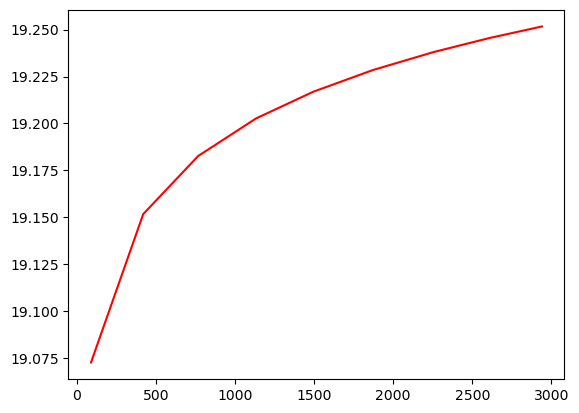

In [98]:
plt.plot(x, f(x,*popt), 'r-')

In [ ]:
def g(x, a, b):
    return a * (x ** b) + 18
x = np.array([item - st	 for item in medMJD])
y = g(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [ ]:
popt,pcov = curve_fit(g, x, med)

In [ ]:
popt

In [ ]:
pcov

In [104]:
popt, pcov = curve_fit(f, target1.MJD - st	, target1.Mag )

In [105]:
popt

array([ 0.40051423,  0.04489737, 18.6614825 ])

In [106]:
pcov

array([[ 0.10367365, -0.01101053, -0.09909431],
       [-0.01101053,  0.00152999,  0.00914264],
       [-0.09909431,  0.00914264,  0.10029471]])

In [107]:
 np.sqrt(np.diag(pcov))

array([0.32198393, 0.03911513, 0.31669341])

In [ ]:
popt, pcov = curve_fit(g, target1.MJD - st	, target1.Mag )

In [ ]:
popt

In [ ]:
pcov

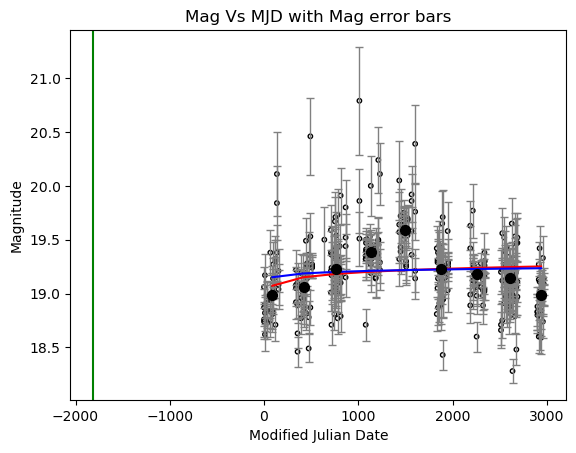

In [110]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 51820-st, color ='g')	
#plt.axvline(x= 53379-st, color ='g')
plt.plot(x, f(x,4.88424409e+01,  1.04479610e-03, -2.99999956e+01), 'r-', zorder=3)
plt.plot(x, f(x,0.40051423,  0.04489737, 18.6614825 ), 'b-', zorder=3)
#plt.plot(x, g(x, 0.66649567, -0.32796038), 'y-', zorder=3)
#plt.plot(x, g(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



In [111]:
 np.sqrt(np.diag(pcov))

array([0.32198393, 0.03911513, 0.31669341])

Text(0.5, 1.0, 'Flux Density Vs MJD with Flux error bars')

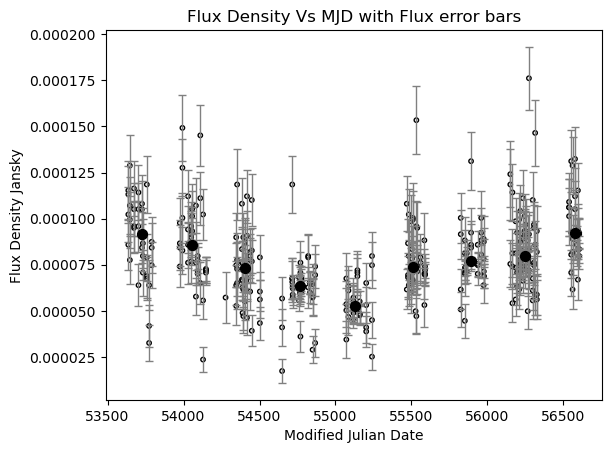

In [125]:
plt.scatter(target1.MJD ,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
#plt.scatter(target1.MJD ,abflux , s = 10, edgecolors = 'r', facecolors = 'none', zorder = 1)
plt.scatter(medMJD ,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')

#plt.axvline(x= 51820 , color ='g')	
#plt.axvline(x= 53379 - st, color ='g')

In [134]:
popt, pcov = curve_fit(f, x, medopflux, maxfev =5000)

In [135]:
popt

array([-0.03349884,  0.00010961,  0.03360099])

In [136]:
pcov

array([[ 2.80102921e+05,  9.15841341e+02, -2.80102987e+05],
       [ 9.15841341e+02,  2.99448989e+00, -9.15841555e+02],
       [-2.80102987e+05, -9.15841555e+02,  2.80103052e+05]])

In [137]:
 np.sqrt(np.diag(pcov))

array([529.24750485,   1.73045945, 529.2476285 ])

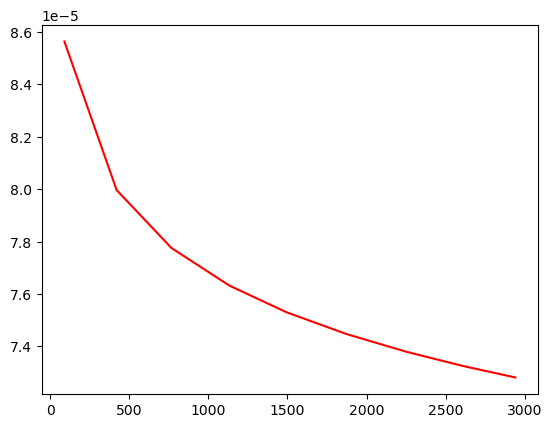

In [138]:
plt.plot(x, f(x,-0.03349884,  0.00010961,  0.03360099), 'r-')

In [139]:
popt, pcov = curve_fit(f, target1.MJD - st, opflux, maxfev =5000)

In [140]:
popt

array([-3.09058620e-05,  4.65255856e-02,  1.20700579e-04])

In [141]:
pcov

array([[ 4.79281411e-10,  6.75276955e-07, -4.58739568e-10],
       [ 6.75276955e-07,  1.22488504e-03, -5.64552292e-07],
       [-4.58739568e-10, -5.64552292e-07,  4.64859656e-10]])

In [142]:
 np.sqrt(np.diag(pcov))

array([2.18924967e-05, 3.49983577e-02, 2.15606043e-05])

In [ ]:
def h(x, a, b):
    return a * (x ** b) + 0.00015
x = np.array([item - st	 for item in medMJD])
y = h(x,4.05245427e+07,-1.3)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [ ]:
popt, pcov = curve_fit(h, x, medopflux, maxfev =5000)

In [ ]:
popt

In [ ]:
plt.plot(x, h(x,*popt), 'r-')

In [ ]:
popt, pcov = curve_fit(h, target1.MJD - st, opflux, maxfev =5000)

In [ ]:
popt

In [ ]:
pcov

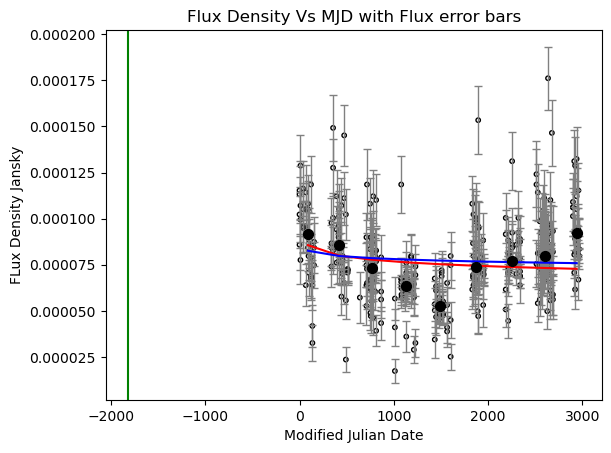

In [143]:
x = np.array([item - st for item in medMJD])
MJD = np.array([item - st for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')

plt.axvline(x= 51820-st, color ='g')	
#plt.axvline(x= -st, color ='g')
plt.plot(x, f(x,-0.03349884,  0.00010961,  0.03360099), 'r-', zorder=3)
plt.plot(x, f(x,-3.09058620e-05,  4.65255856e-02,  1.20700579e-04), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)
#plt.plot(x, h(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g-', zorder=3)


In [ ]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [ ]:
actual = medopflux
predicted1 = func(x,-5.36516262e-05, -1.22346300e-01,  1.57132102e-04)
predicted2 = func(x,0.01887103,  0.00019581, -0.01876289)



In [ ]:
mase(actual,predicted1)

In [ ]:
mase(actual,predicted2)

In [ ]:
resid = opflux - func(x,0.01887103,  0.00019581, -0.01876289)
chi2 = sum((resid / func(x,0.01887103,  0.00019581, -0.01876289))**2)
chi2_red = chi2 / dof
